In [8]:
import numpy as np 
import matplotlib.pyplot as plt

N = 1e6

def xsquared_sinx(x):
    return x**2*np.sin(x)

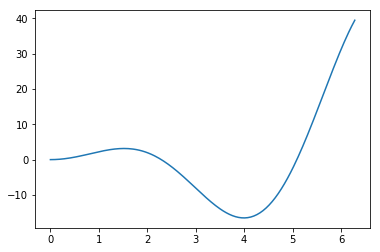

In [17]:
#1.a 
#Calculate the analytical derivative of this function and plot the function in the range 0,2pi

x = np.linspace(0,2*np.pi,200)
plt.plot(x,2*x*np.sin(x)+(x**2)*np.cos(x))
plt.show()

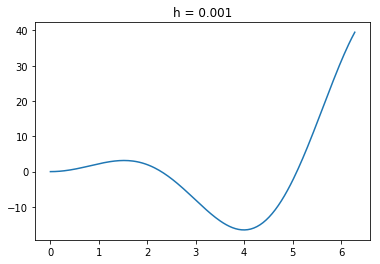

In [56]:
#1.b
# Evaluate the derivative using the central difference method

def central_diff(f,h,x):
    return (f(x+h)-f(x-h))/(2*h) 

h0_1 = central_diff(lambda x:x**2*np.sin(x),0.1,x)
h0_01 = central_diff(lambda x:x**2*np.sin(x),0.01,x)
h0_001 = central_diff(lambda x:x**2*np.sin(x),0.001,x)
#plt.plot(x,h0_1)
#plt.title('h = 0.1')
#plt.show()
#plt.plot(x,h0_01)
#plt.title('h = 0.01')
#plt.show()
plt.plot(x,h0_001)
plt.title('h = 0.001')
plt.show()
#plt.plot(x,h0_001-h0_1)
#plt.title('(h = 0.001) - (h = 0.1)')
#plt.show()


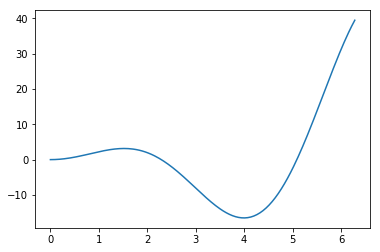

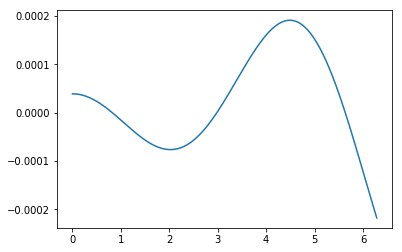

In [76]:
#1.c
#Evaluate the derivative using Ridder's method

def D_calc(i,j,d,D,D_new):
    return (d**(2*(j+1)) * D[j-1] - D_new[j-1]) / (d**(2*(j+1))- 1)

def ridders_differentiator(f,h,x,m):    
    D = np.zeros((m,200))
    d = 2
    for i in range(m):
        D_new = D      
        for j in range(i+1):    
            if j == 0:
                D_new[j] = central_diff(f,h,x)
            else:
                D_new[j] = D_calc(i,j,d,D,D_new)  
        D = D_new    
        h = h/d         
    return D[m-1]

D = ridders_differentiator(lambda x:x**2*np.sin(x),0.1,x,5)

plt.plot(x,D)
plt.show()

# I practice you would want to go up to a certain accuracy. 
# This accuracy is found by taking the difference in values between the 
# last two derived functions. 

plt.plot(x,D-(2*x*np.sin(x)+(x**2)*np.cos(x)))
plt.show()

